<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-4'

In [4]:
os.listdir(base_path)

['data_multi_delta_-4_n250.csv',
 'data_multi_delta_-4_n120.csv',
 'data_multi_delta_-4_n60.csv',
 'data_multi_delta_-4_n30.csv',
 'data_multi_delta_-4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-4_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.659274,58.170081,99.606676,0.000203,260.436234,260.436069,0.000165
1,0.0,1.0,83.061564,67.406097,60.405285,-0.000100,220.872845,220.872946,-0.000101
2,0.0,2.0,95.968108,91.707345,91.419509,0.000020,289.094981,289.094965,0.000016
3,0.0,3.0,61.084088,28.075604,48.603887,0.000632,147.764211,147.763619,0.000592
4,0.0,4.0,86.826714,51.197526,87.140323,0.000016,235.164578,235.164599,-0.000020
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,53.730128,65.483145,29.848571,0.000060,159.061903,159.061933,-0.000030
249996,999.0,246.0,88.172912,24.982171,72.150710,-0.000836,195.304957,195.305547,-0.000590
249997,999.0,247.0,76.438261,52.456337,83.019213,0.000481,221.914293,221.913609,0.000683
249998,999.0,248.0,27.683174,27.730676,45.578465,0.000308,110.992622,110.992268,0.000353


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.659274,58.170081,99.606676,0.000203,260.436234,260.436069,0.000165
1,0.0,1.0,83.061564,67.406097,60.405285,-0.000100,220.872845,220.872946,-0.000101
2,0.0,2.0,95.968108,91.707345,91.419509,0.000020,289.094981,289.094965,0.000016
3,0.0,3.0,61.084088,28.075604,48.603887,0.000632,147.764211,147.763619,0.000592
4,0.0,4.0,86.826714,51.197526,87.140323,0.000016,235.164578,235.164599,-0.000020
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,53.730128,65.483145,29.848571,0.000060,159.061903,159.061933,-0.000030
249996,999.0,246.0,88.172912,24.982171,72.150710,-0.000836,195.304957,195.305547,-0.000590
249997,999.0,247.0,76.438261,52.456337,83.019213,0.000481,221.914293,221.913609,0.000683
249998,999.0,248.0,27.683174,27.730676,45.578465,0.000308,110.992622,110.992268,0.000353


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    92.659274  58.170081  99.606676  0.000203  260.436234   
      1.0    83.061564  67.406097  60.405285 -0.000100  220.872845   
      2.0    95.968108  91.707345  91.419509  0.000020  289.094981   
      3.0    61.084088  28.075604  48.603887  0.000632  147.764211   
      4.0    86.826714  51.197526  87.140323  0.000016  235.164578   
...                ...        ...        ...       ...         ...   
999.0 245.0  53.730128  65.483145  29.848571  0.000060  159.061903   
      246.0  88.172912  24.982171  72.150710 -0.000836  195.304957   
      247.0  76.438261  52.456337  83.019213  0.000481  221.914293   
      248.0  27.683174  27.730676  45.578465  0.000308  110.992622   
      249.0  24.539447  22.988745  84.031401 -0.001800  141.557793   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    260.436069  0.000165  
      1.0    220.872946 -0.000101  
      2.0    289.094965  0.000016  
      3.0    147.763619  0.000592  
      4.0    235.164599 -0.000020  
...                 ...       ...  
999.0 245.0  159.061933 -0.000030  
      246.0  195.305547 -0.000590  
      247.0  221.913609  0.000683  
      248.0  110.992268  0.000353  
      249.0  141.559375 -0.001582  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    92.659274  58.170081  99.606676  0.000203  260.436234   
      1.0    83.061564  67.406097  60.405285 -0.000100  220.872845   
      2.0    95.968108  91.707345  91.419509  0.000020  289.094981   
      3.0    61.084088  28.075604  48.603887  0.000632  147.764211   
      4.0    86.826714  51.197526  87.140323  0.000016  235.164578   
...                ...        ...        ...       ...         ...   
999.0 245.0  53.730128  65.483145  29.848571  0.000060  159.061903   
      246.0  88.172912  24.982171  72.150710 -0.000836  195.304957   
      247.0  76.438261  52.456337  83.019213  0.000481  221.914293   
      248.0  27.683174  27.730676  45.578465  0.000308  110.992622   
      249.0  24.539447  22.988745  84.031401 -0.001800  141.557793   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    260.436069  0.000165  
      1.0    220.872946 -0.000101  
      2.0    289.094965  0.000016  
      3.0    147.763619  0.000592  
      4.0    235.164599 -0.000020  
...                 ...       ...  
999.0 245.0  159.061933 -0.000030  
      246.0  195.305547 -0.000590  
      247.0  221.913609  0.000683  
      248.0  110.992268  0.000353  
      249.0  141.559375 -0.001582  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,92.659274,58.170081,99.606676,0.000203,260.436234,260.436069,0.000165
1,0.0,1.0,83.061564,67.406097,60.405285,-0.000100,220.872845,220.872946,-0.000101
2,0.0,2.0,95.968108,91.707345,91.419509,0.000020,289.094981,289.094965,0.000016
3,0.0,3.0,61.084088,28.075604,48.603887,0.000632,147.764211,147.763619,0.000592
4,0.0,4.0,86.826714,51.197526,87.140323,0.000016,235.164578,235.164599,-0.000020
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,53.730128,65.483145,29.848571,0.000060,159.061903,159.061933,-0.000030
249996,999.0,246.0,88.172912,24.982171,72.150710,-0.000836,195.304957,195.305547,-0.000590
249997,999.0,247.0,76.438261,52.456337,83.019213,0.000481,221.914293,221.913609,0.000683
249998,999.0,248.0,27.683174,27.730676,45.578465,0.000308,110.992622,110.992268,0.000353


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    92.659274  58.170081  99.606676  0.000203  260.436234   
      1.0    83.061564  67.406097  60.405285 -0.000100  220.872845   
      2.0    95.968108  91.707345  91.419509  0.000020  289.094981   
      3.0    61.084088  28.075604  48.603887  0.000632  147.764211   
      4.0    86.826714  51.197526  87.140323  0.000016  235.164578   
...                ...        ...        ...       ...         ...   
999.0 245.0  53.730128  65.483145  29.848571  0.000060  159.061903   
      246.0  88.172912  24.982171  72.150710 -0.000836  195.304957   
      247.0  76.438261  52.456337  83.019213  0.000481  221.914293   
      248.0  27.683174  27.730676  45.578465  0.000308  110.992622   
      249.0  24.539447  22.988745  84.031401 -0.001800  141.557793   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    260.436069  0.000165  
      1.0    220.872946 -0.000101  
      2.0    289.094965  0.000016  
      3.0    147.763619  0.000592  
      4.0    235.164599 -0.000020  
...                 ...       ...  
999.0 245.0  159.061933 -0.000030  
      246.0  195.305547 -0.000590  
      247.0  221.913609  0.000683  
      248.0  110.992268  0.000353  
      249.0  141.559375 -0.001582  

[250000 rows x 7 columns]

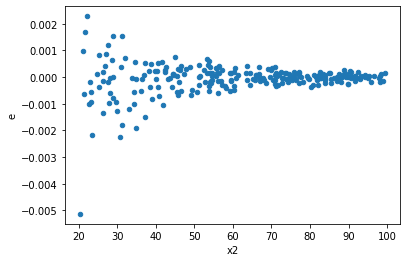

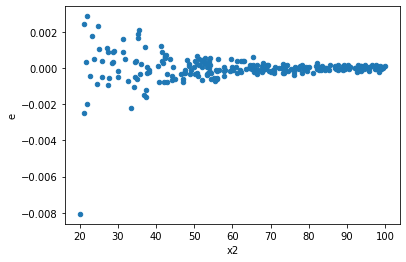

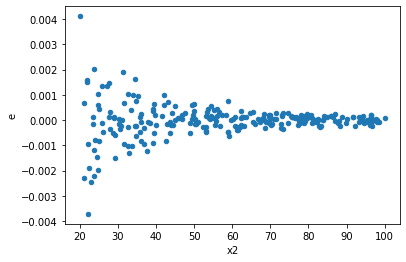

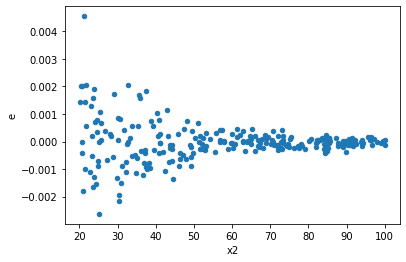

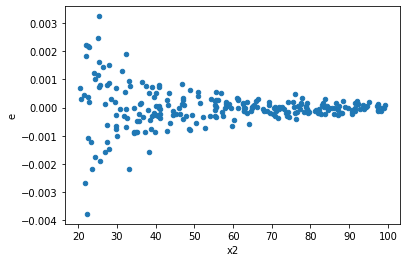

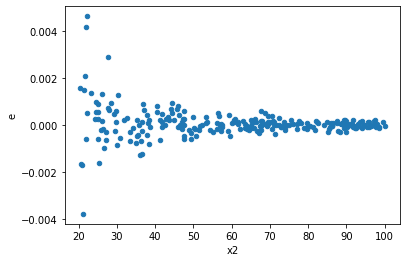

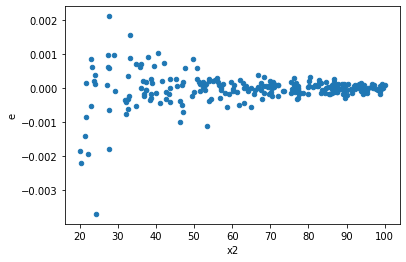

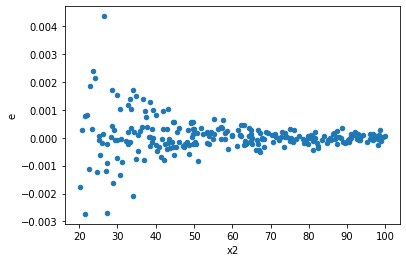

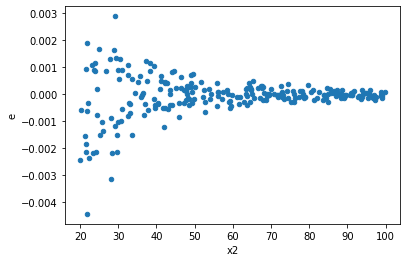

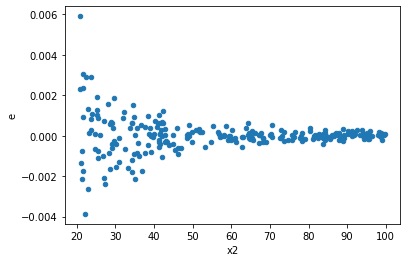

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
923.0,97.0,97.0,3.557129917121694e-05,5.6343692416795544e-05,3.667144244455355e-07,5.808628084205726e-07,1.5839649866481935,0.024496267283249384,0.9877518663583753,0.012248133641624692,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,8.765908186642839e-05,1.2713503661655607e-05,9.037018749116328e-07,1.3106704805830523e-07,0.1450335024159615,7.188645740758173e-19,Reject005=0 : Heteroscedasticity
1.0,97.0,97.0,9.36551413059968e-05,1.7983844471043715e-05,9.655169206803793e-07,1.8540045846436818e-07,0.1920219671900938,1.300636746434673e-14,Reject005=0 : Heteroscedasticity
2.0,97.0,97.0,6.014716276599298e-05,7.809949861639902e-06,6.200738429483812e-07,8.051494702721548e-08,0.1298473527674962,1.1923295993949122e-20,Reject005=0 : Heteroscedasticity
3.0,97.0,97.0,8.644675708170643e-05,1.2385261469555653e-05,8.912036812547054e-07,1.2768310793356343e-07,0.14327040004345729,4.596507975852609e-19,Reject005=0 : Heteroscedasticity
4.0,97.0,97.0,9.66325760207869e-05,1.7316820330596103e-05,9.962121239256382e-07,1.7852392093398045e-07,0.1792027186243181,1.2684613378465484e-15,Reject005=0 : Heteroscedasticity
5.0,97.0,97.0,7.947041035476809e-05,1.5613471712356866e-05,8.192825809769906e-07,1.6096362590058626e-07,0.19646899572628274,2.7757163794401542e-14,Reject005=0 : Heteroscedasticity
6.0,97.0,97.0,0.00011338243533199931,1.4952503238549346e-05,1.1688910858969e-06,1.5414951792318913e-07,0.13187671613126292,2.1339377478300423e-20,Reject005=0 : Heteroscedasticity
7.0,97.0,97.0,7.688446439053975e-05,1.4403415397948834e-05,7.926233442323686e-07,1.48488818535555e-07,0.18733843712282014,5.6995308987666384e-15,Reject005=0 : Heteroscedasticity
8.0,97.0,97.0,7.446513440075811e-05,1.0994501987170202e-05,7.676817979459599e-07,1.13345381311033e-07,0.14764630555824618,1.3770467337808797e-18,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    993
Reject005=1 : Homoscedasticity        7
Name: Result_test, dtype: int64